In [ ]:
%pip install pydicom

### DICOM sample visualization

Automatically created module for IPython interactive environment

Filename.........: dataset/Image-11.dcm
Storage type.....: 1.2.840.10008.5.1.4.1.1.4

Patient's name...: 00009, 
Patient id.......: 00009
Modality.........: MR
Image size.......: 512 x 512, 524288 bytes
Pixel spacing....: [0.468800008296967, 0.468800008296967]
Slice location...: 30.56045723


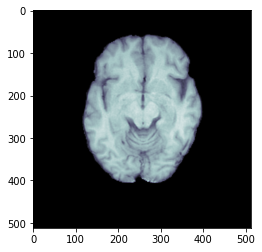

In [1]:
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files

print(__doc__)

# filename = get_testdata_files('CT_small.dcm')[0]
filename = "dataset/Image-11.dcm"
dataset = pydicom.dcmread(filename)

# Normal mode:
print()
print("Filename.........:", filename)
print("Storage type.....:", dataset.SOPClassUID)
print()

pat_name = dataset.PatientName
display_name = pat_name.family_name + ", " + pat_name.given_name
print("Patient's name...:", display_name)
print("Patient id.......:", dataset.PatientID)
print("Modality.........:", dataset.Modality)
# print("Study Date.......:", dataset.StudyDate)

if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

# plot the image using matplotlib
plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
plt.show()

### Papers

**[ 1 ] MRI-Based Deep-Learning Method for Determining Glioma MGMT Promoter Methylation Status**
  * uses intensity normalization with ANTs
  
**[ 2 ] The RSNA-ASNR-MICCAI BraTS 2021 Benchmark on Brain Tumor Segmentation and Radiogenomic Classification**

**[ 3 ] Automatic Prediction of MGMT Status in Glioblastoma via Deep Learning-Based MR Image Analysis**
   * uses intensity normalization
   * data augmentation (image rotations)
   * performance of segmentation task evaluated with DICE Score

### Intensity normalization for MR images:
* https://github.com/ANTsX/ANTs - **Advanced Normalization Tools**
* https://github.com/jcreinhold/intensity-normalization - **Intensity Normalization Package** (see *Recommendation on where to start*)

### Motivation for Intensity Normalization:

Intensity normalization is an important pre-processing step in many image processing applications regarding MR images since MR images have an inconsistent intensity scale across (and within) sites and scanners due to, e.g.,:

the use of different equipment,
different pulse sequences and scan parameters,
and a different environment in which the machine is located.
Importantly, the inconsistency in intensities isn't a feature of the data (unless you want to classify the scanner/site from which an image came)—it's an artifact of the acquisition process. The inconsistency causes a problem with machine learning-based image processing methods, which usually assume the data was gathered iid from some distribution.

## Experiments for MONAI dataset generation

In [198]:
import os
import pprint as pp

modalities = ["t1ce", "t1", "t2", "flair"]

In [248]:
def get_datalist_dict(path):

    datalist = [] 
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(path)):
        # What a mess because of not adding this S$%^
        temp_dict=dict()
        temp_dict["image"] = []
        # skip .DS_Store
        if i <= 2: 
            continue
        for modality in modalities:
            temp_path = f"{dirpath}/{os.path.split(dirpath)[1]}"
            temp_dict["image"].append(f"{temp_path}_{modality}.nii.gz")
        temp_dict["label"] = f"{dirpath}_seg.nii.gz"
        datalist.append(temp_dict)
#         if i == 5:
#             break

        del temp_dict
            
    return datalist
    

In [249]:
path = "/home/advo/dev/kaggle/RSNA-MICCAI-2021/dataset/task1/BraTS2021_Training_Data/"

dl = get_datalist_dict(path)

In [250]:
len(dl)

1249

In [251]:
pp.pprint(dl[123])

{'image': ['/home/advo/dev/kaggle/RSNA-MICCAI-2021/dataset/task1/BraTS2021_Training_Data/BraTS2021_00155/BraTS2021_00155_t1ce.nii.gz',
           '/home/advo/dev/kaggle/RSNA-MICCAI-2021/dataset/task1/BraTS2021_Training_Data/BraTS2021_00155/BraTS2021_00155_t1.nii.gz',
           '/home/advo/dev/kaggle/RSNA-MICCAI-2021/dataset/task1/BraTS2021_Training_Data/BraTS2021_00155/BraTS2021_00155_t2.nii.gz',
           '/home/advo/dev/kaggle/RSNA-MICCAI-2021/dataset/task1/BraTS2021_Training_Data/BraTS2021_00155/BraTS2021_00155_flair.nii.gz'],
 'label': '/home/advo/dev/kaggle/RSNA-MICCAI-2021/dataset/task1/BraTS2021_Training_Data/BraTS2021_00155_seg.nii.gz'}


In [239]:
for i, (dirpath, dirnames, filenames) in enumerate(os.walk(path)):
    if i < 1:
        continue
    if i == 4:
        break
    print(f"i={i}")
    print(f"dirpath = {dirpath}/{os.path.split(dirpath)[1]}")
#     print(f"{os.path.split(dirpath)[1]}")
#     print(f"dirnames = {dirnames}")
#     print(f"filenames = {filenames}")

i=1
dirpath = /home/advo/dev/kaggle/RSNA-MICCAI-2021/dataset/task1/BraTS2021_Training_Data/BraTS2021_01247/BraTS2021_01247
i=2
dirpath = /home/advo/dev/kaggle/RSNA-MICCAI-2021/dataset/task1/BraTS2021_Training_Data/BraTS2021_01255/BraTS2021_01255
i=3
dirpath = /home/advo/dev/kaggle/RSNA-MICCAI-2021/dataset/task1/BraTS2021_Training_Data/BraTS2021_00406/BraTS2021_00406


## NIFTI experiments

In [5]:
%pip install nibabel

  Using cached nibabel-3.2.1-py3-none-any.whl (3.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
import nibabel as nib
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [66]:
image_path = '/home/advo/dev/kaggle/RSNA-MICCAI-2021/dataset/task1/BraTS2021_Training_Data/BraTS2021_00000/BraTS2021_00000_t1ce.nii.gz'
t1ce_img = nib.load(image_path)
image_path = '/home/advo/dev/kaggle/RSNA-MICCAI-2021/dataset/task1/BraTS2021_Training_Data/BraTS2021_00000/BraTS2021_00000_t1.nii.gz'
t1_img = nib.load(image_path)
image_path = '/home/advo/dev/kaggle/RSNA-MICCAI-2021/dataset/task1/BraTS2021_Training_Data/BraTS2021_00000/BraTS2021_00000_t2.nii.gz'
t2_img = nib.load(image_path)
image_path = '/home/advo/dev/kaggle/RSNA-MICCAI-2021/dataset/task1/BraTS2021_Training_Data/BraTS2021_00000/BraTS2021_00000_flair.nii.gz'
flair_img = nib.load(image_path)
image_path = '/home/advo/dev/kaggle/RSNA-MICCAI-2021/dataset/task1/BraTS2021_Training_Data/BraTS2021_00000/BraTS2021_00000_seg.nii.gz'
seg_img = nib.load(image_path)

In [67]:
t1_hdr = t1_img.header
# print(t1_hdr)

In [77]:
t1_data = t1_img.get_fdata()
t1ce_data = t1ce_img.get_fdata()
t2_data = t2_img.get_fdata()
flair_data = flair_img.get_fdata()
seg_data = seg_img.get_fdata()

all_modalities = [t1_data, t1ce_data, t2_data, flair_data, seg_data]
mod_names = ["t1_data", "t1ce_data", "t2_data", "flair_data", "seg_data"]

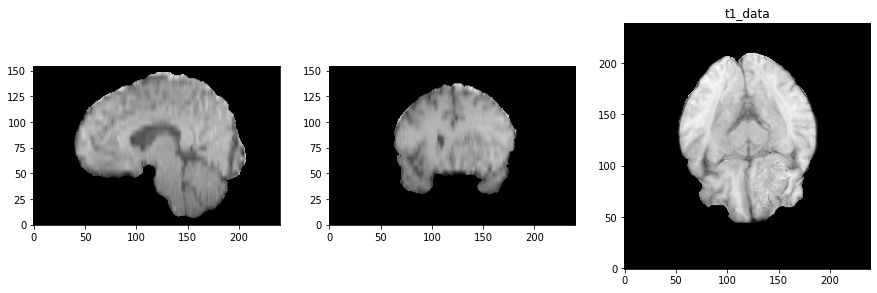

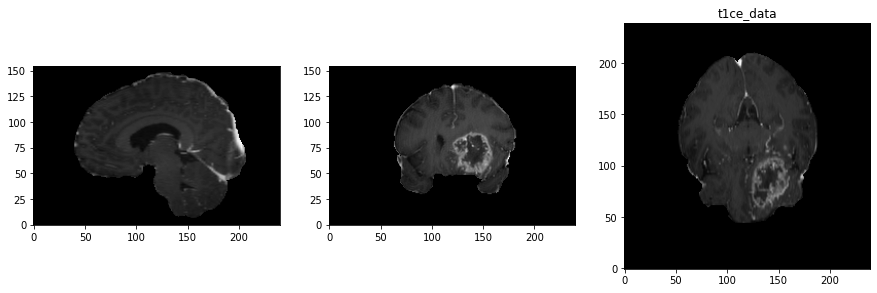

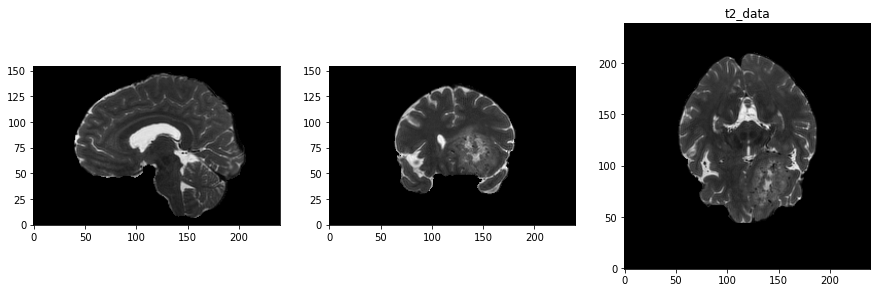

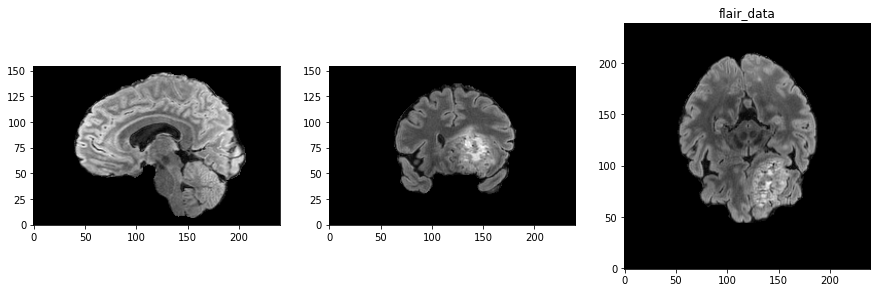

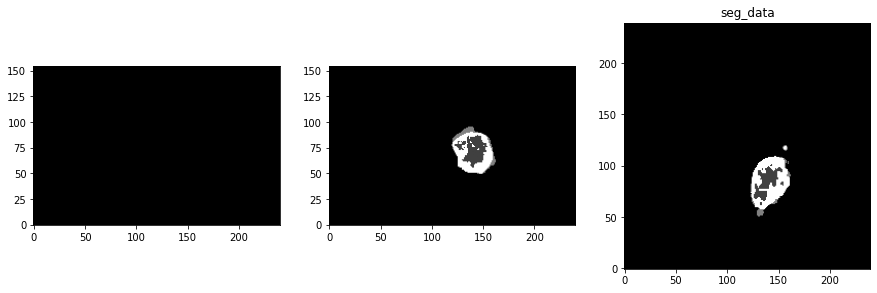

In [159]:
SLICE_x = random.randrange(start=0, stop=t1_data.shape[0])
SLICE_y = random.randrange(start=0, stop=t1_data.shape[1])
SLICE_z = random.randrange(start=0, stop=t1_data.shape[2])

x_slice = list()
y_slice = list()
z_slice = list()

for modality in all_modalities:
    x_slice.append(modality[SLICE_x, :, :])
    y_slice.append(modality[:, SLICE_y, :])
    z_slice.append(modality[:, :, SLICE_z])
    
slices = [x_slice, y_slice, z_slice]

for j, modality in enumerate(all_modalities):
    fig, axes = plt.subplots(1, 3, figsize=(15,15))
    plt.title(mod_names[j])
    axes[0].imshow(x_slice[j].T, cmap="gray", origin="lower")
    axes[1].imshow(y_slice[j].T, cmap="gray", origin="lower")
    axes[2].imshow(z_slice[j].T, cmap="gray", origin="lower")